# DIABETES DATASET

### Context

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Import the dataset

In [1]:
import pandas as pd
diabetes = pd.read_csv('C:\\Users\\Neha\\Desktop\\DataSet\\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the shape of the dataset

In [2]:
diabetes.shape

(768, 9)

### Check the columns present in the dataset

In [3]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Count of 0 and 1 from the diabetes variable

In [4]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Check the descriptive statisticss of the dataset

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check the info of the dataset

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Code to check the missing values present in the dataset

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Extract the dependent variables to create a dataframe X

In [9]:
X = pd.DataFrame()
X = diabetes.loc[:,diabetes.columns != 'Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Extract the independent variable into a dataframe 'y' for model prediction

In [10]:
y = pd.DataFrame()
y = diabetes.loc[:,diabetes.columns == 'Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### Use StandardScaler to normalize X

In [11]:
from sklearn.preprocessing import StandardScaler

standardized = StandardScaler()
standardized.fit(X)
X = standardized.transform(X)

### Split X and y into train and test dataset with test_size = 0.25, random_state=0

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 


### Check the shape of X and y of train dataset

In [15]:
print(X_train.shape)
print(y_train.shape)

(576, 8)
(576, 1)


### Check the shape of X and y of test dataset

In [16]:
print(X_test.shape)
print(y_test.shape)

(192, 8)
(192, 1)


### Create a KNN model instance with n_neighbors = 1 and fit this model to the training data

In [17]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model1 = KNeighborsClassifier(n_neighbors = 1)
    knn_model1.fit(X_train, y_train)
    return knn_model1
knn_model1 = generate()

<ipython-input-17-1b32e476436c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model1.fit(X_train, y_train)


### Use RandomizedSearchCV for hyperparameter tuning of your k nearest neighbor classifier. Keep n_iter as 25, random_state = 0 and for the parameter range use the below ranges:

- "n_neighbors": range(1,30),
- "algorithm" : ["auto", "ball_tree"],
- "leaf_size" : 2 ** np.arange(10),
- "metric" : ["euclidean","manhattan","minkowski","chebyshev"]

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train,y_train)                                         # fitting the model

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   random_state=0)

### Pick a good K Value create a for loop that trains various KNN models with different k values, then keep track of the accuracy_score for each of these models with a list. Also print out the maximum value of accuracy and the K for which it occurs

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []

for i in range(1,30):
    knn_model_ = KNeighborsClassifier(n_neighbors = i)
    knn_model_.fit(X_train, y_train)
    pred_i = knn_model_.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred_i))
    
print("Maximum accuracy and the corresponding value of k is",
        max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d

Maximum accuracy and the corresponding value of k is (0.8072916666666666, 5) respectively.


<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)
<ipython-input-19-daa6c677022e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model_.fit(X_train, y_train)


### Accuracy of model at various k values and find the best value of k

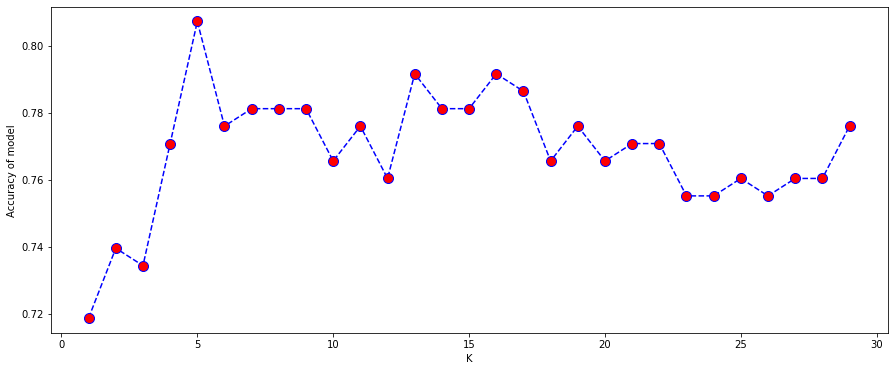

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,6))
plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('K')
plt.ylabel('Accuracy of model')
plt.show()

### Using the best value of k, create KNN model instance with n_neighbors = 5 and fit this model to the training data

In [21]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model3 = KNeighborsClassifier(n_neighbors = 5)
    knn_model3.fit(X_train, y_train)
    return knn_model3
knn_model3 = generate()

<ipython-input-21-d2ec25c92bcb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model3.fit(X_train, y_train)


### Instantitate and fit Logistic Regression model using scikit-learn with random_state = 0

In [22]:
from sklearn.linear_model import LogisticRegression
def generate():
    logreg = LogisticRegression(random_state = 0)
    logreg.fit(X_train,y_train)
    return logreg
logreg = generate()

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Use the models for predictions

In [23]:
def generate():
    predictions_knn_model1 = knn_model1.predict(X_test)
    predictions_knn_model2 = knn_model2.predict(X_test) 
    predictions_knn_model3 = knn_model3.predict(X_test)
    predictions_logreg = logreg.predict(X_test)
    return predictions_knn_model1,predictions_knn_model2,predictions_knn_model3,predictions_logreg
predictions_knn_model1,predictions_knn_model2,predictions_knn_model3,predictions_logreg = generate()

### Evaluate all the models using accuracy score and print them out

In [24]:
from sklearn.metrics import accuracy_score

print('\n\n Accuracy score for test data for knn_model1 is :',accuracy_score(y_test, predictions_knn_model1))
print('\n\n Accuracy score for test data for knn_model2 is :',accuracy_score(y_test, predictions_knn_model2))
print('\n\n Accuracy score for test data for knn_model3 is :',accuracy_score(y_test, predictions_knn_model3))
print('\n\n Accuracy score for test data for logreg model is :',accuracy_score(y_test, predictions_logreg))




 Accuracy score for test data for knn_model1 is : 0.71875


 Accuracy score for test data for knn_model2 is : 0.7708333333333334


 Accuracy score for test data for knn_model3 is : 0.8072916666666666


 Accuracy score for test data for logreg model is : 0.8020833333333334


### Evaluate all the models using confusion matrix and print them out

In [25]:
from sklearn.metrics import confusion_matrix
matrix_knn_model1 = pd.DataFrame()
matrix_knn_model2 = pd.DataFrame()
matrix_knn_model3 = pd.DataFrame()
matrix_logreg = pd.DataFrame()

matrix_knn_model1 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model1))
matrix_knn_model1.index = ['Actual Not Diabetes','Actual Diabetes']
matrix_knn_model1.columns = ['Predicted Not Diabetes','Predicted Diabetes']
print('\n\n confusion matrix for knn_model1 is\n\n',matrix_knn_model1)
    
matrix_knn_model2 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model2))
matrix_knn_model2.index = ['Actual Not Diabetes','Actual Diabetes']
matrix_knn_model2.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model2)
    
     
matrix_knn_model3 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model3))
matrix_knn_model3.index = ['Actual Not Diabetes','Actual Diabetes']
matrix_knn_model3.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model3)
    
matrix_logreg = pd.DataFrame(confusion_matrix(y_test, predictions_logreg))
matrix_logreg.index = ['Actual Not Diabetes','Actual Diabetes']
matrix_logreg.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
print('\n\n confusion matrix for logreg is\n\n',matrix_logreg)



 confusion matrix for knn_model1 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     108                  22
Actual Diabetes                          32                  30


 confusion matrix for knn_model2 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     122                   8
Actual Diabetes                          36                  26


 confusion matrix for knn_model2 is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     115                  15
Actual Diabetes                          22                  40


 confusion matrix for logreg is

                      Predicted Not Diabetes  Predicted Diabetes
Actual Not Diabetes                     118                  12
Actual Diabetes                          26                  36


### Evaluate all the models using classification matrix and print them out

In [26]:
from sklearn.metrics import classification_report

print('\n\n classification report for knn_model1:\n\n',classification_report(y_test, predictions_knn_model1))
print('\n\n classification report for knn_model2:\n\n',classification_report(y_test, predictions_knn_model2))
print('\n\n classification report for knn_model3:\n\n',classification_report(y_test, predictions_knn_model3))
print('\n\n classification report for logreg:\n\n',classification_report(y_test, predictions_logreg))



 classification report for knn_model1:

               precision    recall  f1-score   support

           0       0.77      0.83      0.80       130
           1       0.58      0.48      0.53        62

    accuracy                           0.72       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.71      0.72      0.71       192



 classification report for knn_model2:

               precision    recall  f1-score   support

           0       0.77      0.94      0.85       130
           1       0.76      0.42      0.54        62

    accuracy                           0.77       192
   macro avg       0.77      0.68      0.69       192
weighted avg       0.77      0.77      0.75       192



 classification report for knn_model3:

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.73      0.65      0.68        62

    accuracy                           0.81       192

### Conclusion:

knn_model3 i.e the model with k = 5 comes out to be the best model among the three models used.